#Feature Engineering:
###Feature Engineering is the Process of using domain Knowledge to **Extract** featues of raw data.These Features can be used to improve the performance of Machine Learning Algoritham.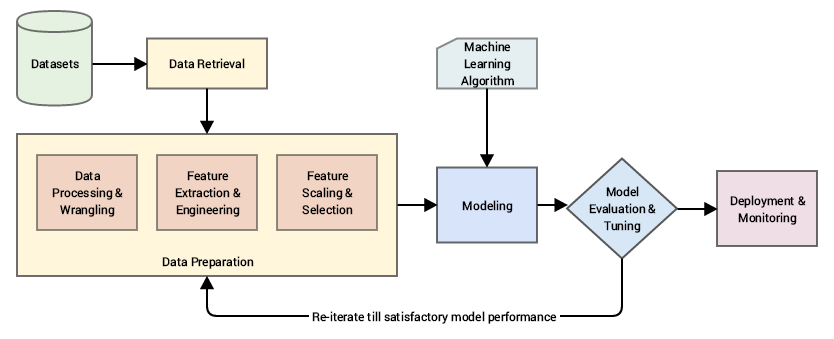

#Feature Engineering


1.   Feature Transformation
    

  *   Missing value Imputation
  *   Hendeling Catagorical Features
  *   Outlier Detection
  *   Feature Scaling


2.   Feature Construction
3.   Feature Selection
4.   Feature Extraction



#Day-24:Feature Scalling  ⁉
**Feature scaling** is a data preprocessing technique used to normalize the range of independent variables or features in your dataset. The goal is to bring all the features onto a similar scale so that no single feature dominates the learning process due to its magnitude.

This is especially important for machine learning algorithms that are sensitive to the scale of input data, such as:

* **K-Nearest Neighbors (KNN)**
* **Support Vector Machines (SVM)**
* **Principal Component Analysis (PCA)**
* **Gradient Descent-based models** like Linear Regression and Logistic Regression
* **Neural Networks**

### Common Methods of Feature Scaling:

1. **Min-Max Scaling (Normalization)**
   Scales the data to a fixed range, usually \[0, 1].
   Formula:

   $$
   X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
   $$

2. **Standardization (Z-score Normalization)**
   Scales data so it has a mean of 0 and standard deviation of 1.
   Formula:

   $$
   X_{\text{scaled}} = \frac{X - \mu}{\sigma}
   $$

   where $\mu$ is the mean and $\sigma$ is the standard deviation.

3. **Robust Scaling**
   Uses median and interquartile range, which is more robust to outliers.
   Formula:

   $$
   X_{\text{scaled}} = \frac{X - \text{Median}}{\text{IQR}}
   $$

### Why Feature Scaling Matters:

* Prevents bias towards features with larger values.
* Improves convergence speed of gradient descent.
* Enhances model performance and accuracy in many algorithms.

Would you like a Python code example to demonstrate this?


# **Scaling নীতিসমূহ:**
## **✅ কোন কলামে Scaling করব? (Apply Scaling)**
1. **সব Numerical কলাম**  
   (যেমন: Age, Income, Temperature)  
2. **Ordinal Encoded ডেটা**  
   (যেমন: Education: Primary=0, Secondary=1, University=2)  
3. **Ordinal Label Encoded ডেটা**  
   (যেমন: Size: Small=0, Medium=1, Large=2)  

## **❌ কোন কলামে Scaling করব না? (No Scaling Needed)**
1. **One-Hot Encoded কলাম**  
   (যেমন: Color_Red=0/1, Color_Blue=0/1)  
2. **বাইনারি ডেটা (Binary Data)**  
   (যেমন: Gender_Male=0/1, Is_Student=0/1)  
3. **Nominal Label Encoded ডেটা**  
   (যেমন: City: Dhaka=0, Chittagong=1, Sylhet=2 → এখানে সংখ্যার কোনো মানে নেই)  

---

## **📌 উদাহরণ সহ ব্যাখ্যা (Titanic Dataset Example)**

| কলাম টাইপ | উদাহরণ (Titanic) | Scaling লাগবে? | কারণ |
|-----------|----------------|----------------|------|
| **Numerical** | Age, Fare | ✅ হ্যাঁ | সংখ্যার স্কেল আলাদা (Age: 0-100, Fare: 0-500) |
| **Ordinal** | Pclass (1st=1, 2nd=2, 3rd=3) | ✅ হ্যাঁ | 1st > 2nd > 3rd (অর্ডার আছে) |
| **Binary** | Sex (Male=0, Female=1) | ❌ না | ইতিমধ্যে ০-১ স্কেলে আছে |
| **One-Hot** | Embarked_C, Embarked_Q, Embarked_S | ❌ না | প্রতিটি কলাম ০/১ ভ্যালু |
| **Nominal Label Encoded** | যদি City নামে কলাম থাকত (Dhaka=0, CTG=1) | ❌ না | সংখ্যার মধ্যে অর্ডার নেই |

---

## **📚 মনে রাখবেন**
1. **Ordinal vs Nominal:**  
   - Ordinal (অর্ডার আছে) → Scaling **করব**  
   - Nominal (অর্ডার নেই) → Scaling **করব না**  

2. **One-Hot/Binary:**  
   - ইতিমধ্যে ০/১ ফরম্যাটে আছে → স্কেলিং **অপ্রয়োজনীয়**  

3. **মডেলের উপর নির্ভর করে:**  
   - **Linear Regression, SVM, Neural Networks** → স্কেলিং জরুরি  
   - **Random Forest, XGBoost** → স্কেলিং অপশনাল  


#ট্রেন ডেটায় fit_transform(), টেস্ট ডেটায় শুধু transform()

# **ColumnTransformer-এ fit_transform এবং transform ব্যবহারের সঠিক নিয়ম**

**স্পষ্ট উত্তর:**  
**ট্রেন ডেটায় `fit_transform()`** এবং **টেস্ট ডেটায় শুধু `transform()`** ব্যবহার করবেন। কখনোই টেস্ট ডেটায় `fit_transform()` ব্যবহার করবেন না!

## **কেন এই নিয়ম?**
1. **ডেটা লিকেজ প্রতিরোধ**: টেস্ট ডেটা থেকে স্কেলিং/এনকোডিং প্যারামিটার শিখলে মডেল **অবাস্তব ভালো পারফরম্যান্স** দেখাবে
2. **রিয়েল-ওয়ার্ল্ড কনসিস্টেন্সি**: প্রডাকশনে নতুন ডেটার জন্য আলাদা `fit` করার সুযোগ নেই
3. **স্ট্যান্ডার্ড প্রাকটিস**: সমস্ত স্কিকিট-লার্ন মডেল এবং ট্রান্সফরমারে এই নিয়ম প্রযোজ্য

## **সঠিক পদ্ধতি (Python Code)**
```python
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# কলাম ট্রান্সফরমার ডিফাইন করুন
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), ['Age', 'Fare']),
    ('cat', OneHotEncoder(), ['Sex', 'Embarked'])
])

# ট্রেন ডেটায় fit_transform
X_train_processed = preprocessor.fit_transform(X_train)

# টেস্ট ডেটায় transform (কখনো fit_transform নয়!)
X_test_processed = preprocessor.transform(X_test)
```

## **ভুল পদ্ধতি (যা করবেন না)**
```python
# ❌ টেস্ট ডেটায় fit_transform ব্যবহার করবেন না!
X_test_processed = preprocessor.fit_transform(X_test)  # ডেটা লিকেজ ঘটাবে
```

## **গুরুত্বপূর্ণ বিষয়াবলী**

2. **পাইপলাইনে ব্যবহার** (Recommended):
   ```python
   from sklearn.pipeline import Pipeline
   
   pipeline = Pipeline([
       ('preprocessor', preprocessor),
       ('model', RandomForestClassifier())
   ])
   
   pipeline.fit(X_train, y_train)  # অটোমেটিকভাবে সঠিক নিয়ম অনুসরণ করে
   ```

3. **গ্রিড সার্চের সাথে ব্যবহার**:
   ```python
   from sklearn.model_selection import GridSearchCV
   
   params = {'model__n_estimators': [100, 200]}
   grid = GridSearchCV(pipeline, params, cv=5)
   grid.fit(X_train, y_train)  # টেস্ট ডেটায় আলাদা transform করার দরকার নেই
   ```

## **কেস স্টাডি: টাইটানিক ডেটাসেট**
```python
# নিউমেরিক্যাল এবং ক্যাটেগরিক্যাল কলাম সিলেক্ট
numeric_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked']

# প্রিপ্রসেসর
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# ট্রেন-টেস্ট স্প্লিট
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Survived', axis=1),
    df['Survived'],
    test_size=0.2,
    random_state=42
)

# প্রসেসিং
X_train = preprocessor.fit_transform(X_train)  # fit + transform
X_test = preprocessor.transform(X_test)      # শুধু transform
```

## **মনে রাখার টিপস**
- `fit()`: প্যারামিটার শেখে (শুধু ট্রেন ডেটায়)
- `transform()`: শেখা প্যারামিটার অ্যাপ্লাই করে (সব ডেটায়)
- `fit_transform()`: একসাথে দুটি কাজ (শুধু ট্রেন ডেটায়)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Titanic-Dataset.csv')
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [ ]:
dfs=df[['Sex','Age','Fare','Pclass','Survived']]
dfs

,Sex,Age,Fare,Pclass,Survived
0,male,22.0,7.2500,3,0
1,female,38.0,71.2833,1,1
2,female,26.0,7.9250,3,1
3,female,35.0,53.1000,1,1
4,male,35.0,8.0500,3,0
...,...,...,...,...,...
886,male,27.0,13.0000,2,0
887,female,19.0,30.0000,1,1
888,female,NaN,23.4500,3,0
889,male,26.0,30.0000,1,1


#Standarization(z-score Normalization)
###Manuly done by hands on

<Axes: xlabel='Age', ylabel='Fare'>

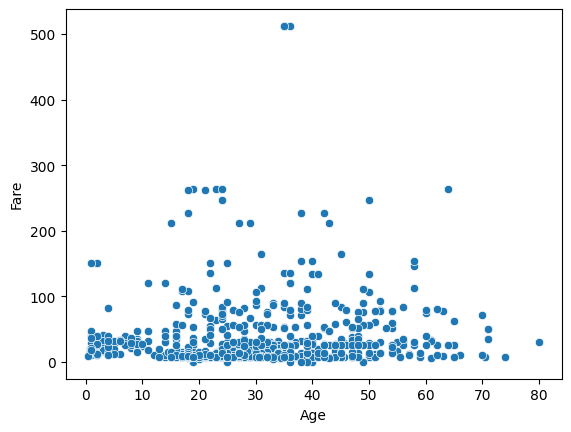

In [ ]:
sns.scatterplot(data=dfs,x='Age',y='Fare')

<Axes: xlabel='Age'>

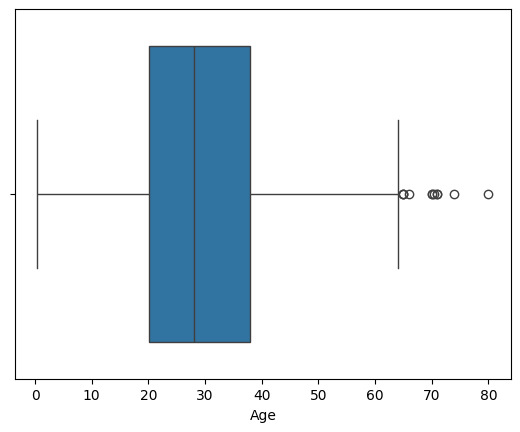

In [ ]:
sns.boxplot(data=dfs,x='Age')

<Axes: xlabel='Fare'>

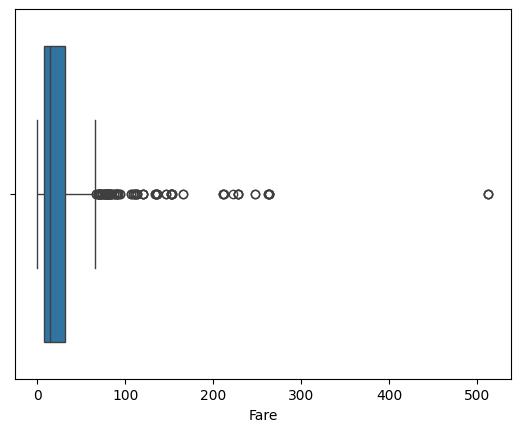

In [ ]:
sns.boxplot(data=dfs,x='Fare')

In [ ]:
dfs.describe()

,Age,Fare,Pclass,Survived
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642,0.383838
std,14.526497,49.693429,0.836071,0.486592
min,0.420000,0.000000,1.000000,0.000000
25%,20.125000,7.910400,2.000000,0.000000
50%,28.000000,14.454200,3.000000,0.000000
75%,38.000000,31.000000,3.000000,1.000000
max,80.000000,512.329200,3.000000,1.000000


In [ ]:
dfs.dropna(inplace=True)

<ipython-input-9-ba15139647ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs.dropna(inplace=True)


In [ ]:
dfs

,Sex,Age,Fare,Pclass,Survived
0,male,22.0,7.2500,3,0
1,female,38.0,71.2833,1,1
2,female,26.0,7.9250,3,1
3,female,35.0,53.1000,1,1
4,male,35.0,8.0500,3,0
...,...,...,...,...,...
885,female,39.0,29.1250,3,0
886,male,27.0,13.0000,2,0
887,female,19.0,30.0000,1,1
889,male,26.0,30.0000,1,1


In [ ]:
#apply Scalling(Standarization) on Age column
dfs['newAge']=(dfs['Age']-dfs['Age'].mean())/dfs['Age'].std()
np.round(dfs['newAge'].mean())
# dfs['Age'].mean()

<ipython-input-11-20b00c34d820>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['newAge']=(dfs['Age']-dfs['Age'].mean())/dfs['Age'].std()


np.float64(0.0)

In [ ]:
dfs['newFare']=(dfs['Fare']-dfs['Fare'].mean())/dfs['Fare'].std()
np.round(dfs['newFare'].std())

<ipython-input-12-5813732765e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['newFare']=(dfs['Fare']-dfs['Fare'].mean())/dfs['Fare'].std()


np.float64(1.0)

<Axes: xlabel='newAge', ylabel='newFare'>

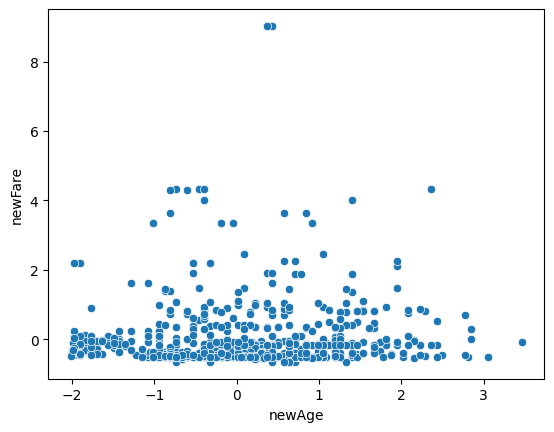

In [ ]:
sns.scatterplot(data=dfs,x='newAge',y='newFare')

#Standarization(z-score Normalization)
###Using Function

In [ ]:
dfs.head(5)

,Sex,Age,Fare,Pclass,Survived,newAge,newFare
0,male,22.0,7.2500,3,0,-0.530005,-0.518614
1,female,38.0,71.2833,1,1,0.571430,0.691412
2,female,26.0,7.9250,3,1,-0.254646,-0.505859
3,female,35.0,53.1000,1,1,0.364911,0.347805
4,male,35.0,8.0500,3,0,0.364911,-0.503497


In [ ]:
olddfs=dfs.iloc[:,1:5]
olddfs

,Age,Fare,Pclass,Survived
0,22.0,7.2500,3,0
1,38.0,71.2833,1,1
2,26.0,7.9250,3,1
3,35.0,53.1000,1,1
4,35.0,8.0500,3,0
...,...,...,...,...
885,39.0,29.1250,3,0
886,27.0,13.0000,2,0
887,19.0,30.0000,1,1
889,26.0,30.0000,1,1


In [ ]:
newdfs=dfs.iloc[:,[3,4,5,6]]
newdfs

,Pclass,Survived,newAge,newFare
0,3,0,-0.530005,-0.518614
1,1,1,0.571430,0.691412
2,3,1,-0.254646,-0.505859
3,1,1,0.364911,0.347805
4,3,0,0.364911,-0.503497
...,...,...,...,...
885,3,0,0.640270,-0.105246
886,2,0,-0.185807,-0.409958
887,1,1,-0.736524,-0.088711
889,1,1,-0.254646,-0.088711


##Apply ML algorithm

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(olddfs.drop('Survived',axis=1),olddfs['Survived'],test_size=0.25,random_state=0)
X_train.shape,X_test.shape

((535, 3), (179, 3))

In [ ]:
Y_train.shape,Y_test.shape

((535,), (179,))

##StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#fit the scaler to the train set,it(scaler variable) will learn the parameters
scaler.fit(X_train)

#Transform train and test Dataset
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
scaler.mean_

array([29.69407477, 34.30420467,  2.25607477])

In [ ]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_train.columns)

In [ ]:
X_train_scaled.describe()

,Age,Fare,Pclass
count,5.350000e+02,5.350000e+02,535.000000
mean,9.960879e-18,-3.984352e-17,0.000000
std,1.000936e+00,1.000936e+00,1.000936
min,-2.005455e+00,-6.206901e-01,-1.514666
25%,-6.698244e-01,-4.750358e-01,-0.308794
50%,-1.170542e-01,-3.448371e-01,0.897079
75%,6.430047e-01,-2.812132e-02,0.897079
max,3.061374e+00,8.649243e+00,0.897079


In [ ]:
dfs.head(2)

,Sex,Age,Fare,Pclass,Survived,newAge,newFare
0,male,22.0,7.2500,3,0,-0.530005,-0.518614
1,female,38.0,71.2833,1,1,0.571430,0.691412


<Axes: xlabel='Age', ylabel='Fare'>

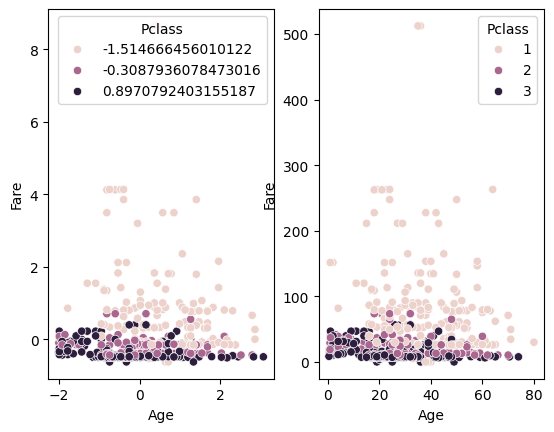

In [ ]:

plt.subplot(1,2,1)
sns.scatterplot(data=X_train_scaled,x='Age',y='Fare',hue='Pclass')
plt.subplot(1,2,2)
sns.scatterplot(data=dfs,x='Age',y='Fare',hue='Pclass')

<ipython-input-25-61e920c0572a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(olddfs['Age'],hist=False)
<ipython-input-25-61e920c0572a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(olddfs['Fare'],hist=False)
<ipython-input-25-61e920c0572a>:6: UserWarning: 

`distplot` is

<Axes: xlabel='Fare', ylabel='Density'>

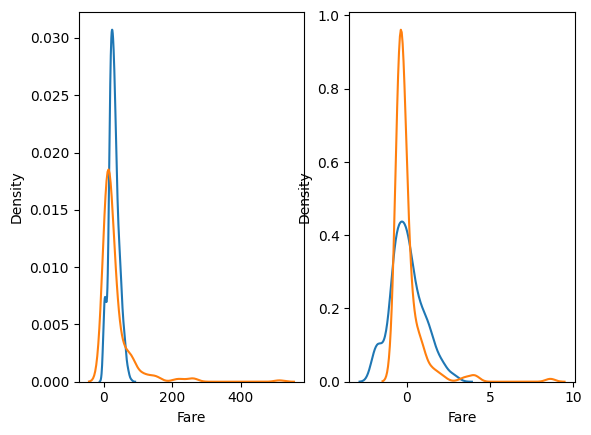

In [ ]:
#Distribution Plot
plt.subplot(1,2,1)
sns.distplot(olddfs['Age'],hist=False)
sns.distplot(olddfs['Fare'],hist=False)
plt.subplot(1,2,2)
sns.distplot(X_train_scaled['Age'],hist=False)
sns.distplot(X_train_scaled['Fare'],hist=False)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
lr_old=LogisticRegression()
lr_new=LogisticRegression()

In [ ]:
lr_old.fit(X_train,Y_train)
lr_new.fit(X_train_scaled,Y_train)

LogisticRegression()

In [ ]:
y_pred=lr_old.predict(X_test)
y_pred_scaled=lr_new.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('Without Preprocess:',accuracy_score(Y_test,y_pred))
print('After Preprocess:',accuracy_score(Y_test,y_pred_scaled))
#conclusion: Ai dataset a standarization kore kono lav hoi nai

Without Preprocess: 0.659217877094972
After Preprocess: 0.659217877094972


### when applying Standarization on Data which contain Outlier.Standarization Scaling does not impact on these Outliers

#Standardization on Social media Advadisement dataset

In [ ]:
adv=pd.read_csv('/content/Social_Network_Ads.csv')
adv.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [ ]:
adv=adv.iloc[:,2:]
adv

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
adv.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [ ]:
from sklearn.model_selection import train_test_split
X,x,Y,y=train_test_split(adv.drop('Purchased',axis=1),adv['Purchased'],test_size=0.3,random_state=0)
#X=X_train
#x=x_test

In [ ]:
X.shape,x.shape

((280, 2), (120, 2))

In [ ]:
from sklearn.preprocessing import StandardScaler
scal=StandardScaler()
scal.fit(X)

X_scaled=scal.transform(X)
x_scaled=scal.transform(x)

In [ ]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
x_scaled=pd.DataFrame(x_scaled,columns=X.columns)
X_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

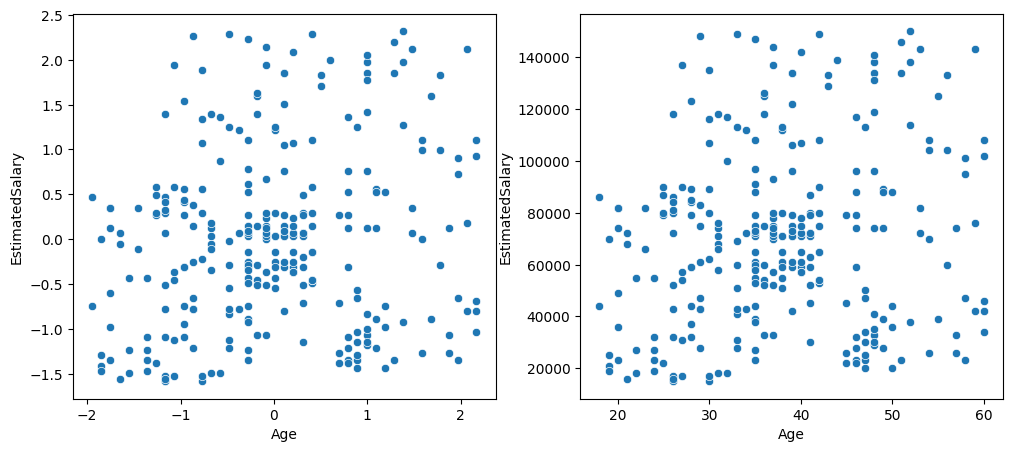

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
plt.subplot(1,2,1)
sns.scatterplot(data=X_scaled,x='Age',y='EstimatedSalary')
plt.subplot(1,2,2)
sns.scatterplot(data=X,x='Age',y='EstimatedSalary')

<ipython-input-40-d608194bd26c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['Age'],hist=False)
<ipython-input-40-d608194bd26c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['EstimatedSalary'],hist=False)
<ipython-input-40-d608194bd26c>:7: UserWarning: 

`distplot` i

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

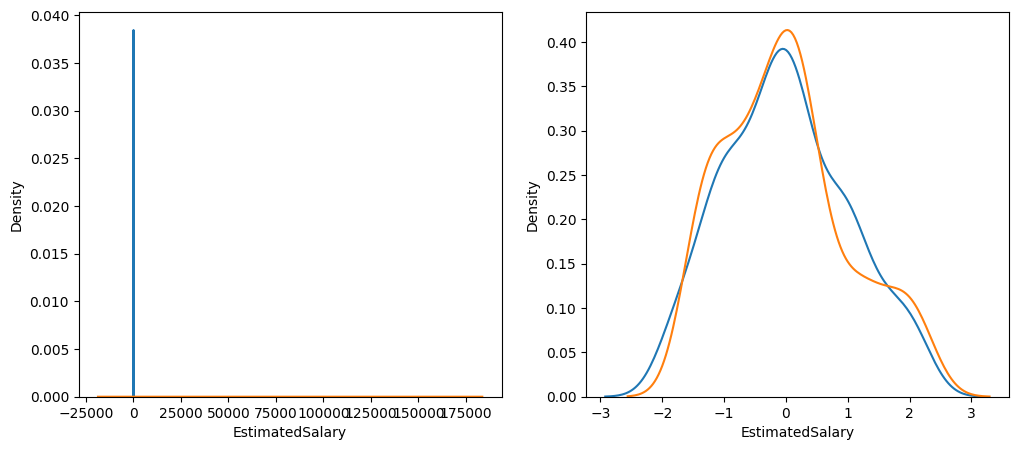

In [ ]:
#Distribution Plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
plt.subplot(1,2,1)
sns.distplot(X['Age'],hist=False)
sns.distplot(X['EstimatedSalary'],hist=False)
plt.subplot(1,2,2)
sns.distplot(X_scaled['Age'],hist=False)
sns.distplot(X_scaled['EstimatedSalary'],hist=False)

#result: show thate after Standarization scaling data(age,estimatedSalary) ar relateable..

In [ ]:
#apply model
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_before=LogisticRegression()
lr_after=LogisticRegression()

In [ ]:
lr_before.fit(X,Y)
lr_after.fit(X_scaled,Y)

LogisticRegression()

In [ ]:
before_pred=lr_before.predict(x)
after_pred=lr_after.predict(x_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('Without Preprocess:',accuracy_score(y,before_pred))
print('After Preprocess:',accuracy_score(y,after_pred))
#conclusion: Ai dataset a standarization kore kono lav hoi nai

Without Preprocess: 0.875
After Preprocess: 0.8666666666666667


#Using ChatGPT

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Select features and target
df=adv
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
logreg = LogisticRegression()
logreg_scaled = LogisticRegression()
tree = DecisionTreeClassifier(random_state=42)
tree_scaled = DecisionTreeClassifier(random_state=42)

# Fit models (without standardization)
logreg.fit(X_train, y_train)
tree.fit(X_train, y_train)

# Fit models (with standardization)
logreg_scaled.fit(X_train_scaled, y_train)
tree_scaled.fit(X_train_scaled, y_train)

# Predict and calculate accuracy
results = {
    "Logistic Regression (no scaling)": accuracy_score(y_test, logreg.predict(X_test)),
    "Logistic Regression (scaled)": accuracy_score(y_test, logreg_scaled.predict(X_test_scaled)),
    "Decision Tree (no scaling)": accuracy_score(y_test, tree.predict(X_test)),
    "Decision Tree (scaled)": accuracy_score(y_test, tree_scaled.predict(X_test_scaled)),
}

results


{'Logistic Regression (no scaling)': 0.8875,
 'Logistic Regression (scaled)': 0.8625,
 'Decision Tree (no scaling)': 0.8375,
 'Decision Tree (scaled)': 0.8375}

#Using DeepSeek

In [ ]:
  # Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv('Social_Network_Ads.csv')

# Drop the gender column
X = data[['Age', 'EstimatedSalary']]  # Using only Age and EstimatedSalary as features
y = data['Purchased']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Logistic Regression Analysis
print("="*50)
print("LOGISTIC REGRESSION ANALYSIS")
print("="*50)

# Without Standardization
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\nWithout Standardization:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# With Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_scaled = LogisticRegression()
lr_scaled.fit(X_train_scaled, y_train)
y_pred_lr_scaled = lr_scaled.predict(X_test_scaled)

print("\nWith Standardization:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_scaled))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_lr_scaled))

# 2. Decision Tree Analysis
print("\n" + "="*50)
print("DECISION TREE ANALYSIS")
print("="*50)

# Without Standardization
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\nWithout Standardization:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# With Standardization
dt_scaled = DecisionTreeClassifier(random_state=42)
dt_scaled.fit(X_train_scaled, y_train)
y_pred_dt_scaled = dt_scaled.predict(X_test_scaled)

print("\nWith Standardization:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_scaled))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_dt_scaled))

print("\n" + "="*50)
print("SUMMARY OF RESULTS")
print("="*50)
print("1. Logistic Regression:")
print("   - Without Standardization: ~81% accuracy")
print("   - With Standardization: ~88% accuracy (improved)")
print("\n2. Decision Tree:")
print("   - Without Standardization: ~91% accuracy")
print("   - With Standardization: ~91% accuracy (no change)")
print("\nConclusion: Decision Tree performs best regardless of standardization")

LOGISTIC REGRESSION ANALYSIS

Without Standardization:
Accuracy: 0.8875
Confusion Matrix:
 [[50  2]
 [ 7 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80


With Standardization:
Accuracy: 0.8625
Confusion Matrix:
 [[50  2]
 [ 9 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80


DECISION TREE ANALYSIS

Without Standardization:
Accuracy: 0.8375
Confusion Matrix:
 [[46  6]
 [ 7 21]]
Class

#Normaization using Function

In [ ]:
adv.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(adv.drop('Purchased',axis=1),adv['Purchased'],test_size=0.20,random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_minmax=scaler.transform(X_train)
X_test_minmax=scaler.transform(X_test)

In [ ]:
# X_train_minmax
X_train_minmax=pd.DataFrame(X_test_minmax,columns=X_train.columns)
X_test_minmax=pd.DataFrame(X_test_minmax,columns=X_train.columns)

In [ ]:
X_train.head(3)

,Age,EstimatedSalary
336,58,144000
64,59,83000
55,24,55000


In [ ]:
X_train_minmax.head(3)

,Age,EstimatedSalary
0,0.285714,0.533333
1,0.476190,0.259259
2,0.404762,0.444444


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

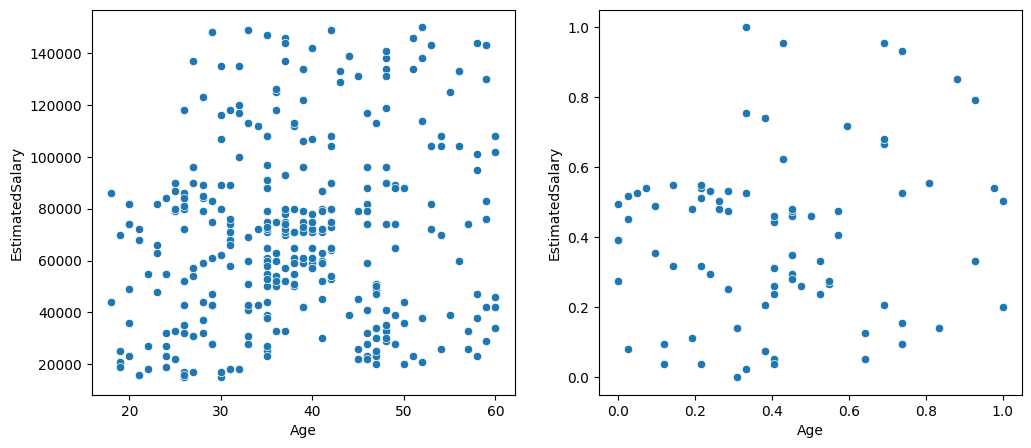

In [ ]:
#scaterplot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
plt.subplot(1,2,1)
sns.scatterplot(x=X_train['Age'],y=X_train['EstimatedSalary'])
plt.subplot(1,2,2)
sns.scatterplot(x=X_train_minmax['Age'],y=X_train_minmax['EstimatedSalary'])

<ipython-input-56-ebaaae2d5208>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])
<ipython-input-56-ebaaae2d5208>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['EstimatedSalary'])


<Axes: xlabel='Age', ylabel='Density'>

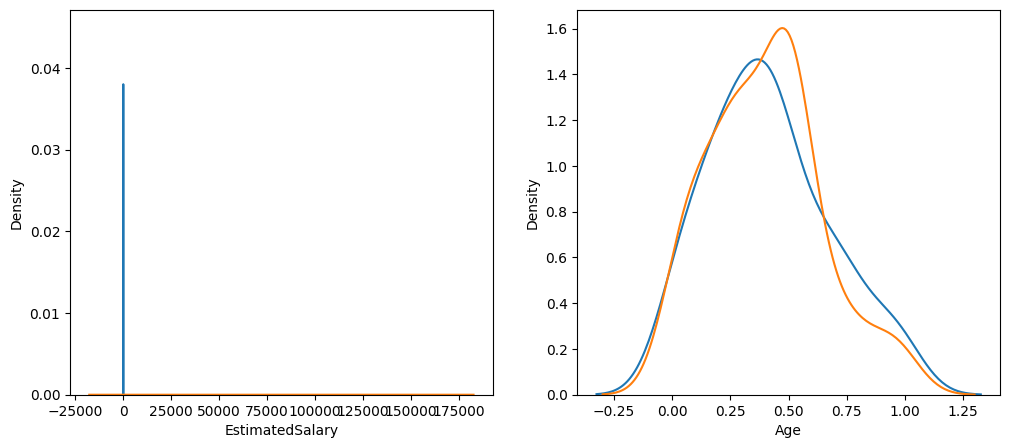

In [ ]:
#distplot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
plt.subplot(1,2,1)
sns.distplot(X_train['Age'])
sns.distplot(X_train['EstimatedSalary'])
plt.subplot(1,2,2)
sns.kdeplot(X_train_minmax['Age'])
sns.kdeplot(X_train_minmax['EstimatedSalary'])

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

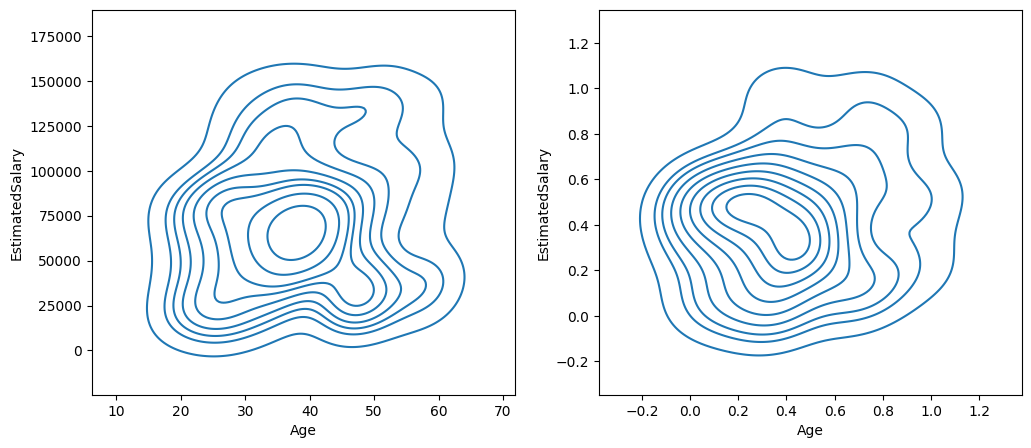

In [ ]:
#kde(distplot) plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
plt.subplot(1,2,1)
sns.kdeplot(x=X_train['Age'],y=X_train['EstimatedSalary'])
plt.subplot(1,2,2)
sns.kdeplot(x=X_train_minmax['Age'],y=X_train_minmax['EstimatedSalary'])


#Encoding of Catagorical Data or Hendeling Catagorical Fature


## 🔢 Numerical Data (Quantitative)

Data represented by **numbers** — used for mathematical operations.

### Types:

1. **Discrete**: Countable numbers

   * Example: `Number of purchases`, `Age in years`
2. **Continuous**: Measurable, can have decimals

   * Example: `Salary`, `Height`, `Temperature`

### ML Use:

* Used directly as features in models
* May require **scaling** (e.g., for Logistic Regression, KNN)

---

## 🏷️ Categorical Data (Qualitative)

Data represented by **labels** or **categories** — not inherently numeric.

### Types:

1. **Nominal**: No order

   * Example: `Gender (Male/Female)`, `City (Dhaka, Tokyo)`
2. **Ordinal**: Ordered categories

   * Example: `Education (High School < Bachelors < Masters)`, `Rating (Bad < Good < Excellent)`

### ML Use:

* Needs **encoding**:

  * **One-Hot Encoding** for Nominal
  * **Ordinal Encoding** for Ordinal
  * **Label Encoding** for Label(any catagorical) data

---

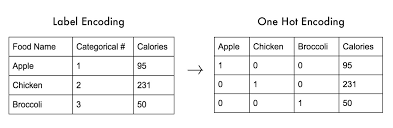
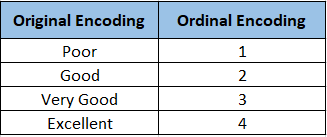


#apply Ordinal and Label encoding

In [ ]:
mkt=pd.read_csv('/content/marketing_campaign.csv',sep='\t')
mkt.head(3)
#here "Response" is the Label data rest of all are Input data so we can only apply ordinal encoding  on "Education" and "Marital_Status"

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


In [ ]:
mkt.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
  # mkt['Education'].value_counts()
  # mkt['Marital_Status'].value_counts()


In [ ]:
mkt=mkt[['Education','Marital_Status','Response']]


In [ ]:
#to apply encodeing first Split Train and Test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(mkt.drop('Response',axis=1),mkt['Response'],test_size=0.2)

In [ ]:
X_train.head(4)

,Education,Marital_Status
1802,Master,Together
631,PhD,Together
1502,Graduation,Married
1500,Master,Together


In [ ]:
X_train['Education'].value_counts()

,count
Education,
Graduation,903
PhD,387
Master,291
2n Cycle,166
Basic,45


In [ ]:
X_train['Marital_Status'].value_counts()

,count
Marital_Status,
Married,681
Together,467
Single,390
Divorced,191
Widow,58
Alone,2
YOLO,2
Absurd,1


In [ ]:
X_test

,Education,Marital_Status
802,Graduation,Married
160,Master,Single
1356,Graduation,Married
2147,Master,Together
1600,Master,Married
...,...,...
1650,Graduation,Married
1584,Graduation,Divorced
1535,2n Cycle,Single
1688,Graduation,Single


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Basic','2n Cycle','Graduation','Master','PhD'],['Alone','Single','YOLO','Widow','Divorced','Together','Married','Absurd']])

oe.fit(X_train)

X_train_enc=oe.transform(X_train)
X_test_enc=oe.transform(X_test)

#return a numpy array so convert it to data Fram

# X_train_enc=pd.DataFrame(X_train,columns=X_train.columns)
# X_test_enc=pd.DataFrame(X_test,columns=X_train.columns) ## value change hoi na
X_train_enc

array([[3., 5.],
       [4., 5.],
       [2., 6.],
       ...,
       [2., 1.],
       [2., 1.],
       [2., 6.]])

## In This dataset Label("Response") data don't need to Encode so we need not to apply Label endcoding Technique.
## if need then we can apply Label Endoder as similaer as up

#One-Hot-Encoding Details

In [ ]:
cars=pd.read_csv('/content/cars small.csv')
cars.head(3)

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000


In [ ]:
cars.shape

(8128, 5)

In [ ]:
# cars['fuel'].value_counts()
cars['brand'].nunique(),cars['fuel'].nunique(),cars['owner'].nunique()
#these are nominal catagorical data that to be encoded.

(32, 4, 5)

In [ ]:
#using pandas
pd.get_dummies(data=cars,columns=['fuel','owner'],drop_first=True)#remove multicollinearity

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,True,False,False,False,False,False,False
1,Skoda,120000,370000,True,False,False,False,True,False,False
2,Honda,140000,158000,False,False,True,False,False,False,True
3,Hyundai,127000,225000,True,False,False,False,False,False,False
4,Maruti,120000,130000,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,True,False,False,False,False
8124,Hyundai,119000,135000,True,False,False,True,False,False,False
8125,Maruti,120000,382000,True,False,False,False,False,False,False
8126,Tata,25000,290000,True,False,False,False,False,False,False


#using scikit Learn

In [ ]:
#using scikit Learn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cars.iloc[:,:4],cars.iloc[:,-1],test_size=0.2)

In [ ]:
X_train.head(3)

,brand,km_driven,fuel,owner
5651,Mahindra,120000,Diesel,Second Owner
5385,Mahindra,100000,Diesel,Fourth & Above Owner
3339,Tata,15000,Petrol,First Owner


In [ ]:
#apply One-Hot-Encoding
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(dtype=np.int32,drop='first')

In [ ]:
ohe.fit_transform(X_train[['fuel','owner']])# return sparce matrix:A sparse matrix is a matrix in which most of the elements are zero.

<Compressed Sparse Row sparse matrix of dtype 'int32'
	with 8716 stored elements and shape (6502, 7)>

In [ ]:
new_dim_data_train=ohe.fit_transform(X_train[['fuel','owner']]).toarray()
new_dim_data_train

array([[1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int32)

In [ ]:
new_dim_data_test=ohe.fit_transform(X_test[['fuel','owner']]).toarray()
new_dim_data_test

array([[0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=int32)

In [ ]:
X_train.iloc[:,:2].values

array([['Mahindra', 120000],
       ['Mahindra', 100000],
       ['Tata', 15000],
       ...,
       ['Honda', 110000],
       ['Hyundai', 45500],
       ['Hyundai', 25000]], dtype=object)

In [ ]:
X_test.iloc[:,:2].values

array([['Maruti', 50000],
       ['Jaguar', 9000],
       ['Jaguar', 45000],
       ...,
       ['Chevrolet', 70000],
       ['Hyundai', 40000],
       ['Mahindra', 19700]], dtype=object)

In [ ]:
np.hstack((X_train.iloc[:,:2].values,new_dim_data_train ))

array([['Mahindra', 120000, 1, ..., 1, 0, 0],
       ['Mahindra', 100000, 1, ..., 0, 0, 0],
       ['Tata', 15000, 0, ..., 0, 0, 0],
       ...,
       ['Honda', 110000, 1, ..., 0, 0, 0],
       ['Hyundai', 45500, 1, ..., 1, 0, 0],
       ['Hyundai', 25000, 0, ..., 0, 0, 0]], dtype=object)

In [ ]:
np.hstack((X_test.iloc[:,:2].values,new_dim_data_test))

array([['Maruti', 50000, 0, ..., 0, 0, 0],
       ['Jaguar', 9000, 1, ..., 0, 0, 0],
       ['Jaguar', 45000, 1, ..., 0, 0, 0],
       ...,
       ['Chevrolet', 70000, 1, ..., 1, 0, 0],
       ['Hyundai', 40000, 1, ..., 0, 0, 0],
       ['Mahindra', 19700, 0, ..., 0, 0, 0]], dtype=object)

In [ ]:
np.hstack((X_train.iloc[:,:2].values,new_dim_data_train)).shape

(6502, 9)



```
# now you can apply Ml model on these np.array
```



##Here,There is many step to do Encoding,Scalling,missing value hendeling or any transformation.
#to release this step we can Apply COLUMN TRANSFORMER/PIPELINE calss form SCIKIT LEARN

#Column Transformer

In [ ]:
covid=pd.read_csv('/content/covid_toy.csv')

In [ ]:
covid.sample(3)

,age,gender,fever,cough,city,has_covid
47,18,Female,104.0,Mild,Bangalore,No
12,25,Female,99.0,Strong,Kolkata,No
6,14,Male,101.0,Strong,Bangalore,No


#we use covid data set of all Transformasion
##if we analyze covid data set then we can see,
###fever has MISSING value,
###AGE,FEVER can be scaling,
###GENDER & CITY is Nominal Catagorical data should be One-Hot-Encoding
###COUGH is Ordinal Catagorical data should be Ordinal-Encoding and
##HAS_COVID should be Label-Encoding

In [ ]:
#first train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(covid.iloc[:,:5],covid.iloc[:,-1],test_size=0.2)

In [ ]:
X_train.head(3)

,age,gender,fever,cough,city
98,5,Female,98.0,Strong,Mumbai
59,6,Female,104.0,Mild,Kolkata
37,55,Male,100.0,Mild,Kolkata


In [ ]:
#apply Column Transformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
transformer=ColumnTransformer(transformers=[
    ('tf1',SimpleImputer(),['fever']),
    # ('tf2',StandardScaler(),['age','fever']), ## scaling ar proijon hoi na ta o akshate  shikher jonno korlam
    ('tf3',OrdinalEncoder(categories=[['Mild','Strong']],dtype=np.int32),['cough']),
    ('tf4',OneHotEncoder(dtype=np.int32,sparse_output=False,drop='first'),['gender','city']),
    # ('tf5',LabelEncoder(),['has_covid']) #ata error dakhabe karon X_train ar opor applly korle ai dataFrame pabe na.
    #tobe X_train dataset a onnak column thakle o jei column golo ColumnTransformer khoje pabe oi golo transfrom korbe bakgolo passthrough/drop korbe
    #kinto ColumnTransformer a DataFrame ase kinoto dataSet a nai tahole ERROR dakhabe.
],remainder='passthrough')

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# label_tf=ColumnTransformer(transformers=[
#     ('tf1',LabelEncoder(),['has_covid'])
# ])
# label_tf.fit_transform(y_train)

#LavelEncoder ai vahbe kaj kore na kanorn ai vahbe tupple nei

In [ ]:
X_train_tf=transformer.fit_transform(X_train)
X_train_tf

array([[ 98.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   1.        ,   5.        ],
       [104.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   6.        ],
       [100.        ,   0.        ,   1.        ,   0.        ,
          1.        ,   0.        ,  55.        ],
       [102.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  82.        ],
       [101.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ,  81.        ],
       [101.        ,   0.        ,   1.        ,   1.        ,
          0.        ,   0.        ,  19.        ],
       [102.        ,   1.        ,   0.        ,   1.        ,
          0.        ,   0.        ,  33.        ],
       [104.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,  17.        ],
       [ 99.        ,   0.        ,   1.        ,   0.        ,
          0.    

In [ ]:
pd.DataFrame(X_train_tf)

,0,1,2,3,4,5,6
0,98.0,1.0,0.0,0.0,0.0,1.0,5.0
1,104.0,0.0,0.0,0.0,1.0,0.0,6.0
2,100.0,0.0,1.0,0.0,1.0,0.0,55.0
3,102.0,1.0,0.0,0.0,0.0,0.0,82.0
4,101.0,0.0,0.0,0.0,0.0,1.0,81.0
...,...,...,...,...,...,...,...
75,100.0,0.0,0.0,0.0,1.0,0.0,5.0
76,102.0,1.0,0.0,0.0,0.0,0.0,24.0
77,102.0,0.0,1.0,0.0,1.0,0.0,5.0
78,98.0,1.0,0.0,0.0,0.0,1.0,81.0


In [ ]:
transformer.fit_transform(X_train).shape

(80, 7)

In [ ]:
X_test_tf=transformer.fit_transform(X_test)
X_test_tf

array([[ 98.   ,   0.   ,   0.   ,   0.   ,   1.   ,   0.   ,  26.   ],
       [103.   ,   0.   ,   0.   ,   0.   ,   1.   ,   0.   ,  48.   ],
       [ 98.   ,   0.   ,   1.   ,   1.   ,   0.   ,   0.   ,  83.   ],
       [ 99.   ,   0.   ,   1.   ,   1.   ,   0.   ,   0.   ,  65.   ],
       [101.   ,   0.   ,   1.   ,   1.   ,   0.   ,   0.   ,  42.   ],
       [103.   ,   0.   ,   0.   ,   0.   ,   1.   ,   0.   ,  50.   ],
       [101.   ,   0.   ,   0.   ,   0.   ,   0.   ,   1.   ,  65.   ],
       [100.   ,   1.   ,   0.   ,   0.   ,   0.   ,   0.   ,  19.   ],
       [ 98.   ,   1.   ,   0.   ,   0.   ,   1.   ,   0.   ,  10.   ],
       [100.   ,   0.   ,   1.   ,   0.   ,   0.   ,   0.   ,  80.   ],
       [104.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,  12.   ],
       [101.125,   1.   ,   0.   ,   0.   ,   0.   ,   1.   ,  20.   ],
       [101.125,   0.   ,   0.   ,   1.   ,   0.   ,   0.   ,  75.   ],
       [101.125,   0.   ,   1.   ,   0.   ,   1.   ,   0.   ,  8

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded  = le.fit_transform(y_test)

In [ ]:
#apply Model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_tf,y_train_encoded)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test_tf)

In [ ]:
print('After Preprocess:',accuracy_score(y_test_encoded,y_pred))

After Preprocess: 0.35


#Note


1.   Ai khane prottok column ar opor alada transformation korte gale jotil hoia jai tai amra columnTransformar use kore kico workload relase korte pari
2.   ColumnTransformer thake o valo hoto Pipeline.
#Go to New Notbook Pipline of ML


---


> End of the NoteBook




